In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

In [190]:
def estimate_coef(x,y):
    #number of observation/point
    n=np.size(x)
    #mean of x and y vehctor
    m_x,m_y=np.mean(x), np.mean(y)
    ss_xy=np.sum(y*x)-n*m_y*m_x
    ss_xx=np.sum(x*x)-n*m_y*m_x
    b1=ss_xy/ss_xx
    b0=m_y-b1*m_x
    
    return(b0,b1)

In [191]:
def plot_regression_line (x,y,b):
    plt.scatter(x,y,color='m',marker='o',s=30)
    #predicted
    ypred=b[0]+b[1]*x
    #plot pred
    plt.plot(x,ypred,color='g')
    #label
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()

In [192]:
def main():
    x=np.array([1,2,3,4,5,6,7,8,9,10])
    y=np.array([10,15,24,26,36,44,55,70,75,88])

    #estimate coefficient
    b=estimate_coef(x,y)
    print((b[0],b[1]))
    
    plot_regression_line (x,y,b)
    


Estimated coefficients: 
 b_0 = 1.3479361370716507           
 b_1 = 0.7840083073727934


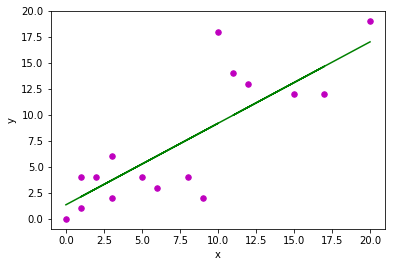

In [193]:
def main():
    x = np.array([0,1,2,3,3,5,10,9,8,6,1,17,11,12,15,20])
    y = np.array([0,1,4,6,2,4,18,2,4,3,4,12,14,13,12,19])
    
    #print coef
    b = estimate_coef(x, y)
    print("Estimated coefficients: \n b_0 = {} \
          \n b_1 = {}".format(b[0], b[1]))
    plot_regression_line(x,y,b)
    
if __name__=='__main__':
    main()    

In [3]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

C:\Users\nikita059240\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [119]:
df=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)

In [120]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

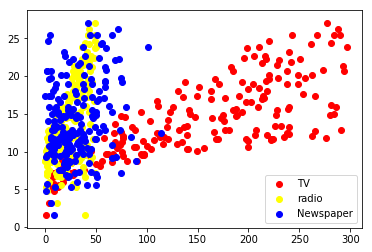

In [14]:
plt.scatter(df['TV'], df['sales'], label="TV",color="red")
plt.scatter(df['radio'], df['sales'], label="radio",color="yellow")
plt.scatter(df['newspaper'], df['sales'], label="Newspaper",color="blue")
plt.legend()
plt.show()

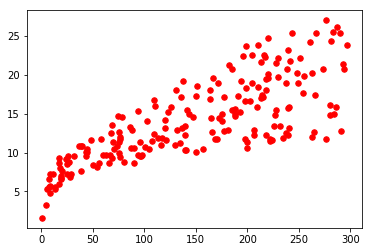

In [15]:
plt.scatter(x='TV',y='sales',data=df,color='r',marker='o',s=30)
plt.show()

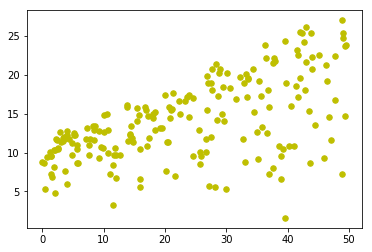

In [16]:
plt.scatter(x='radio',y='sales',data=df,color='y',marker='o',s=30)
plt.show()

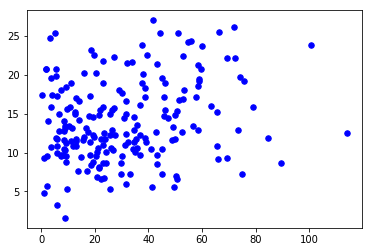

In [17]:
plt.scatter(x='newspaper',y='sales',data=df,color='b',marker='o',s=30)
plt.show()

In [18]:
lm=smf.ols(formula='sales~TV', data=df).fit()
lm

In [19]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Setiap terjadi kenaikan 1 unit tv maka meningkatkan sales sebesar 0.0475

In [20]:
x_new=pd.DataFrame({'TV':[50]})
x_new

,TV
0,50


In [21]:
lm.predict(x_new)

0    9.409426
dtype: float64

In [22]:
x_new=pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
x_new

,TV
0,0.7
1,296.4


In [23]:
lm.rsquared

0.611875050850071

In [24]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 30 May 2018   Prob (F-statistic):           1.47e-42
Time:                        08:56:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
lm=smf.ols(formula='sales~TV+radio', data=df).fit()
lm
lm.params

Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64

In [27]:
x_new=pd.DataFrame({'TV':[df.TV.min(),df.TV.max()],'radio':[df.radio.min(),df.radio.max()]})
x_new

,TV,radio
0,0.7,0.0
1,296.4,49.6


In [28]:
lm.rsquared

0.8971942610828957

In [29]:
lm.conf_int()

,0,1
Intercept,2.340343,3.501857
TV,0.043013,0.048497
radio,0.172139,0.203850


In [30]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 30 May 2018   Prob (F-statistic):           4.83e-98
Time:                        08:56:15   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
lm=smf.ols(formula='sales~TV+radio+newspaper', data=df).fit()
lm
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [32]:
x_new=pd.DataFrame({'TV':[df.TV.min(),df.TV.max()],'radio':[df.radio.min(),df.radio.max()], 'newspaper':[df.newspaper.min(),df.newspaper.max()]})
x_new

,TV,newspaper,radio
0,0.7,0.3,0.0
1,296.4,114.0,49.6


In [33]:
lm.rsquared

0.8972106381789522

In [34]:
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 30 May 2018   Prob (F-statistic):           1.58e-96
Time:                        08:56:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
import sklearn
from sklearn.linear_model import LinearRegression
lm=LinearRegression()


In [45]:
y=df['sales']
x = df.drop('sales', 1)


,TV,radio,newspaper,Size,IsLarge
1,230.1,37.8,69.2,small,0
2,44.5,39.3,45.1,small,0
3,17.2,45.9,69.3,small,0
4,151.5,41.3,58.5,small,0
5,180.8,10.8,58.4,small,0
6,8.7,48.9,75.0,small,0
7,57.5,32.8,23.5,small,0
8,120.2,19.6,11.6,small,0
9,8.6,2.1,1.0,small,0
10,199.8,2.6,21.2,small,0


In [60]:
lm.intercept_

2.9117013282568553

In [61]:
lm.coef_

array([ 0.04571982,  0.18872814, -0.00109768,  0.05742385])

In [69]:
lm.score(x,y)

0.8972106381789521

In [54]:
import numpy as np
np.random.seed(12345)

In [55]:
nums=np.random.rand(len(df))
mask_large=nums>0.5

In [56]:
df['Size']='small'
df.loc[mask_large,'Size']='large'
df.head()

,TV,radio,newspaper,sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,0
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,0


In [71]:
df['IsLarge']=df.Size.map({'small':0,'large':1})
df.head()

AttributeError: 'DataFrame' object has no attribute 'Size'

In [74]:
y=df.sales
x=df.drop('sales', 1)

x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [59]:
lm=LinearRegression()
lm.fit(m,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [243]:
lm.intercept_

2.9117013282568553

In [244]:
lm.coef_

array([ 0.04571982,  0.18872814, -0.00109768,  0.05742385])

In [264]:
np.random.seed(123456)
nums=np.random.rand(len(df))
mask_suburban=(nums>0.33)& (nums<0.66)
mask_urban=nums>0.66
df['Area']='rural'
df.loc[mask_suburban,'Area']='suburban'
df.loc[mask_urban,'Area']='urban'
df.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [265]:
area_dummies=pd.get_dummies(df.Area,prefix='Area').iloc[:,1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


In [266]:
data=pd.concat([df,area_dummies],axis=1)
data.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [269]:
m=data.drop('Size', 1)
m=m.drop('Area',1)
m.head()

,TV,radio,newspaper,sales,IsLarge,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,1,0,0
2,44.5,39.3,45.1,10.4,0,0,1
3,17.2,45.9,69.3,9.3,0,0,0
4,151.5,41.3,58.5,18.5,0,0,1
5,180.8,10.8,58.4,12.9,1,1,0


In [278]:
y=m.sales
x=m.drop('sales', 1)
x.head()

,TV,radio,newspaper,IsLarge,Area_suburban,Area_urban
1,230.1,37.8,69.2,1,0,0
2,44.5,39.3,45.1,0,0,1
3,17.2,45.9,69.3,0,0,0
4,151.5,41.3,58.5,0,0,1
5,180.8,10.8,58.4,1,1,0


In [274]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [275]:
lm.intercept_

2.8741909890879125

In [276]:
lm.coef_

array([ 0.04574401,  0.1878667 , -0.0010877 ,  0.07739661, -0.10656299,
        0.26813802])

# tranining testing

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [77]:
#Untuk mengecek model salah satu caranya dengan melakukan training dan testing 
feature_cols=['TV','radio','newspaper']
x=df[feature_cols]
y=df.sales

In [78]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
y_pred_train=lm.predict(x_train)
y_pred_test=lm.predict(x_test)

In [80]:
#residual=actual-predicted
train_pred_df=pd.DataFrame({'actual':y_train, 'predicted':y_pred_train,'residual':y_train-y_pred_train})

In [81]:
#Untuk mengecek model salah satu caranya dengan melakukan training dan testing 
feature_cols=['TV','radio','newspaper']
x=df[feature_cols]
y=df.sales

In [82]:
#residual=actual-predicted
train_pred_df=pd.DataFrame({'actual':y_test, 'predicted':y_pred_test,'residual':y_test - y_pred_test})
train_pred_df.head(10)

,actual,predicted,residual
96,16.9,16.314921,0.585079
16,22.4,20.819300,1.580700
31,21.4,21.633934,-0.233934
159,7.3,10.384199,-3.084199
129,24.7,22.255492,2.444508
116,12.6,12.919689,-0.319689
70,22.3,21.108912,1.191088
171,8.4,7.394980,1.005020
175,11.5,13.744357,-2.244357
46,14.9,15.161523,-0.261523


In [83]:
from sklearn import metrics

In [84]:
#root mean square error untuk mengukur akurasi (mengukur error)
rmse_train=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
rmse_train

1.601247667558773

In [85]:
rmse_test=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
rmse_test

1.815975816200249

cek selisih rmse semakin kecil semakin kecil error

In [86]:
metrics.r2_score(y_train,y_pred_train)

0.9022905037730669

In [87]:
metrics.r2_score(y_test,y_pred_test)

0.8792230188851212

karena selisih R2 tidak terlalu jauh maka model ok

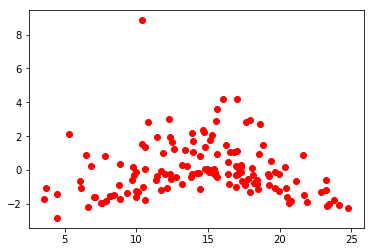

In [89]:
#untuk yang training
plt.scatter(lm.predict(x_train),lm.predict(x_train)-y_train,color='red')

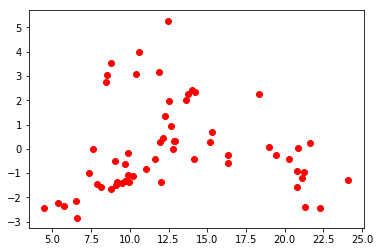

In [90]:
#untuk yang training
plt.scatter(lm.predict(x_test),lm.predict(x_test)-y_test,color='red')

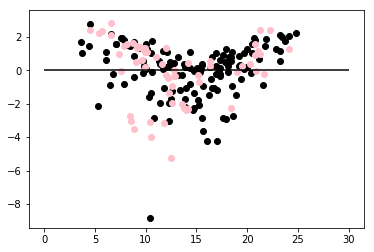

In [101]:
#untuk yang training
plt.scatter(lm.predict(x_train),-lm.predict(x_train)+y_train,color='black')
#untuk yang training
plt.scatter(lm.predict(x_test),-lm.predict(x_test)+y_test,color='pink')
plt.hlines(y=0, xmin = 0, xmax=30)

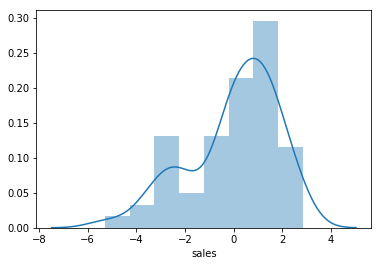

In [102]:
import seaborn as sns

residual = y_test - y_pred_test
sns.distplot(residual, hist=True)

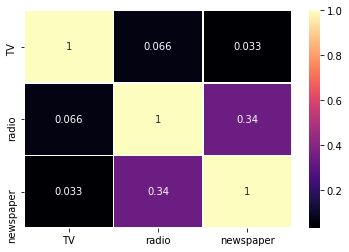

In [105]:
corr = x_train.corr()
df = pd.DataFrame(x_train.corr())
sns.heatmap(df, cmap='magma', linewidths=0.5, annot=True)
plt.show()

In [106]:
import scipy
mc=scipy.corrcoef(x_train,rowvar=0)
print(mc)

[[1.         0.06593822 0.03312809]
 [0.06593822 1.         0.34159872]
 [0.03312809 0.34159872 1.        ]]


In [107]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# get y and X dataframes based on this regression:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [108]:
vif.round(1)

,VIF Factor,features
0,2.5,TV
1,3.3,radio
2,3.1,newspaper


In [123]:
#bikin model
import statsmodels.formula.api as smf
lm2=smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()
lm2.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [124]:
from scipy import stats
stats.shapiro(lm2.resid)

(0.9176644086837769, 3.938041004403203e-09)

tydack normal

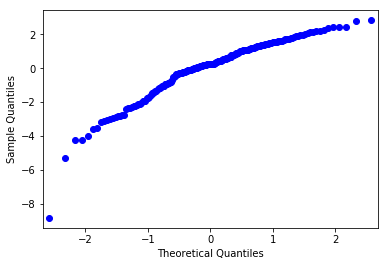

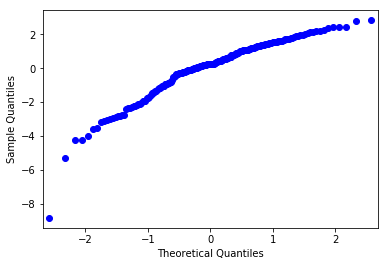

In [125]:
sm.qqplot(lm2.resid)

In [126]:
from statsmodels.stats import diagnostic

diagnostic.acorr_ljungbox(lm2.resid, lags=1)

#p-value > 0.05 sehingga tidak ada autocorrelation

(array([0.44613369]), array([0.50417674]))

In [128]:
#H0: error term are homoscedasity #variansinya konstan
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

test=sms.het_goldfeldquandt(lm2.resid,lm2.model.exog)
test

(1.3516832040090752, 0.07082060666290767, 'increasing')

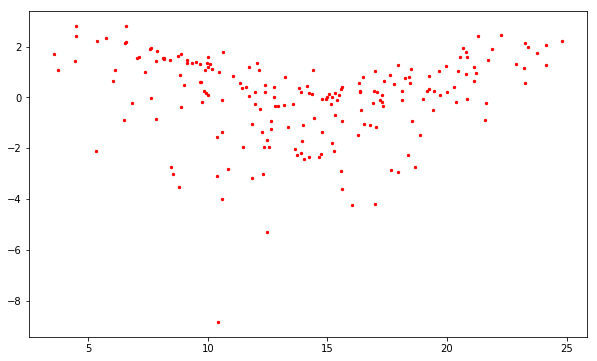

In [129]:
plt.figure(figsize=(10,6))
plt.scatter(lm2.predict(), lm2.resid, s = 5.5, color='r')
plt.show()

## Laverage, Influential, Outlier

In [131]:
#Laverage untuk data ekstrim, kalau ekstrimnya jauh banget disebut high laverage
#lavereage adalah ekstrim value berdasarkan nilai x
#berarti kalau ada multiple predictors (x) 
#Influencial, akan memberikan efek ke model regresinya

In [133]:
influence=lm2.get_influence()
resid_student=influence.resid_studentized_external
resid=pd.concat([x_train,pd.Series(resid_student,name="Studentized Residuals")],axis=1)
resid.head()

,TV,radio,newspaper,Studentized Residuals
0,NaN,NaN,NaN,0.946804
1,230.1,37.8,69.2,-1.162079
2,44.5,39.3,45.1,-1.831389
3,17.2,45.9,69.3,0.538774
4,151.5,41.3,58.5,-0.172887


In [134]:
#mau cari outlier mana yang penting dan harus dibuang karna berpengaruh

In [135]:
resid.loc[np.absolute(resid["Studentized Residuals"])>3,:]

,TV,radio,newspaper,Studentized Residuals
5,180.8,10.8,58.4,-3.288033
130,59.6,12.0,43.1,-5.757983


In [136]:
resid.loc[np.absolute(resid["Studentized Residuals"])>3,:]

,TV,radio,newspaper,Studentized Residuals
5,180.8,10.8,58.4,-3.288033
130,59.6,12.0,43.1,-5.757983


In [138]:
#index influential
ind=resid.loc[np.absolute(resid["Studentized Residuals"])>3,:].index
ind

Int64Index([5, 130], dtype='int64')

In [139]:
#selanjutnya row 5 sama 130 harus di drop sebab mempengaruhi model
y_train.drop(ind)

170    15.0
98     15.5
32     11.9
13      9.2
36     12.8
120     6.6
43     20.7
190     6.7
91     11.2
137     9.5
52     10.7
128     8.8
163    14.9
42     17.1
119    15.9
114    15.9
27     15.0
140    20.7
101    11.7
112    21.8
3       9.3
78     14.2
47     10.6
188    17.3
192     9.9
86     15.2
162    13.3
37     25.4
191    10.8
62     24.2
       ... 
59     23.8
49     14.8
89     12.9
22     12.5
58     13.2
161    14.4
193     5.9
38     14.7
158    10.1
194    19.6
2      10.4
53     22.6
150    10.1
131     1.6
152    11.6
104    14.7
100    17.2
117    12.2
88     16.0
75     17.0
122     7.0
200    13.4
21     18.0
189    15.9
72     12.4
107     7.2
15     19.0
93     19.4
180    12.6
103    14.8
Name: sales, Length: 138, dtype: float64

In [148]:
def plot_learning_curve(model,x,y):
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),"r-+",label="train")
    plt.plot(np.sqrt(val_errors),"b",label="val")

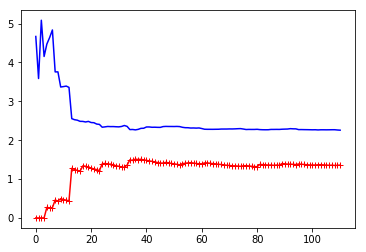

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
plot_learning_curve(lm, x_train, y_train)

rmse. pada iterasi ke 40 keatas average error suah konstan tidak berubah terlalu banyak lagi. di awal sempat stabil di0 karna data yang digunakan masih merupakan data training. training 80:20 untuk yang biru validation diawal errornya tinggi karena sampelnya masih dikit, dibandingkan dengan error yang dihasilkan dari data traning. semakin ditambah observasinya r nya turun meskipun tidak akan pernah sampe nol